# Práctica: Los Juegos del Hambre

ESTUDIANTE: `ESCRIBE TU NOMBRE AQUI`

<table><tr>
    <td><img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/breakfast.jpg" style="width:300px;height:300px;"></td>
    <td><img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/hamburger.jpg" style="width:300px;height:300px;"></td>
    <td><img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/fruits.jpg" style="width:300px;height:300px;"></td>
</tr></table>

En esta práctica vamos a enfrentarnos a un problema desafiante de clasificación de imágenes, construyendo una red neuronal profunda que sea capaz de clasificar entre diferentes tipos de comida. ¡Que comiencen los Juegos del Hambre!

## Guidelines

A lo largo del notebook encontrarás celdas que debes rellenar con tu propio código. Sigue las instrucciones del notebook y presta atención a los siguientes iconos:

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Deberás resolver el ejercicio escribiendo tu propio código o respuesta en la celda inmediatamente inferior.</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
Esto es una pista u observación de utilidad que puede ayudarte a resolver el ejercicio. Presta atención a estas pistas para comprender el ejercicio en mayor profundidad.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>
Este es un ejercicio avanzado que te puede ayudar a profundizar en el tema, y a conseguir una calificación más alta. ¡Buena suerte!</font>

***

Para evitar problemas con imports o incompatibilidades se recomienda hacer uso [Google Colaboratory](https://colab.research.google.com/). Asegúrate de [conectar una GPU](https://colab.research.google.com/notebooks/gpu.ipynb), y de haber [deactivado otras sesiones que tuvieras activas](https://stackoverflow.com/a/53441194/2436578).

El siguiente código mostrará todas las gráficas en el propio notebook en lugar de generar una nueva ventana.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Obtención de datos

Vamos a usar un dataset de imágenes de comida disponible en [Kaggle](https://www.kaggle.com/trolukovich/food11-image-dataset).

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Usa la celda inferior para descargar el dataset de Kaggle, siguiendo el ejemplo de ejercicios anteriores.
</font>

***

In [2]:
# Subiendo Kaggle API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rcarrascoc","key":"f358e382cf40db639979224d94ce9e2e"}'}

In [3]:
# Moviendo Kaggle API key al directorio correcto
import os
import shutil
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("/content/kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

In [4]:
# Descargando dataset de Kaggle
!kaggle datasets download trolukovich/food11-image-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/trolukovich/food11-image-dataset
License(s): CC0-1.0


Revisa ahora la carpeta en la que has descargado los datos. Verás que contiene 3 subdirectorios:

* **training**, contiene las imágenes a utilizar para entrenar el modelo.
* **validation**, contiene imágenes adicionales que podrías usar como datos de entrenamiento adicionales, o para algún tipo de estrategia de validación como Early Stopping.
* **evaluation**, contiene las imágenes que debes utilizar para testear el modelo. Las imágenes de esta carpeta **solo** pueden utilizarse para medir el rendimiento del modelo tras su entrenamiento, y para nada más.

Además de esto, dentro de cada una de estas carpetas encontrarás una subcarpeta para cada una de las 11 clases de comida:

* Bread (panes)
* Dairy product (lácteos)
* Dessert (postres)
* Egg (huevos)
* Fried food (fritos)
* Meat (carnes)
* Noodles-Pasta (pasta)
* Rice (arroz)
* Seafood (pescado y marisco)
* Soup (sopas)
* Vegetable-Fruit (vegetales y frutas)

Para facilitar los pasos de procesamiento que vendrán a continuación, vamos a definir algunas variables que nos indiquen dónde están almacenados los diferentes conjuntos de datos.

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    Crea variables <b>TRAINDIR</b>, <b>VALDIR</b> y <b>TESTDIR</b>, cada una conteniendo una cadena de texto con la ruta al directorio donde están los datos de entrenamiento, validación y evaluación, respectivamente.
</font>

***

In [5]:
TRAINDIR = '/content/training'
VALDIR = '/content/validation'
TESTDIR = '/content/evaluation'

### Reducción de clases

Con el fin de hacer este problema más accesible de cara a la práctica, vamos a centrarnos solo en seis de las clases de comida disponibles: `Bread`, `Dairy product`, `Dessert`, `Egg`, `Fried food` y `Meat`. Para ello, se provee el código siguiente, que elimina de los datos descargados las carpetas correspondientes a imágenes de las otras clases.

In [6]:
from glob import glob
import os

valid_classes = {"Bread", "Dairy product", "Dessert", "Egg", "Fried food", "Meat"}
datasets = {TRAINDIR, VALDIR, TESTDIR}

for dataset in datasets:
    for classdir in glob(f"{dataset}/*"):  # Find subfolders with classes
        if classdir.split("/")[-1] not in valid_classes:  # Ignore those in valid_classes
            print(f"Deleting {classdir}...")
            for fname in glob(f"{classdir}/*.jpg"):  # Remove each image file
                os.remove(fname)
            os.rmdir(classdir)  # Remove folder

Deleting /content/validation/Noodles-Pasta...
Deleting /content/validation/Rice...
Deleting /content/validation/Soup...
Deleting /content/validation/Vegetable-Fruit...
Deleting /content/validation/Seafood...
Deleting /content/training/Noodles-Pasta...
Deleting /content/training/Rice...
Deleting /content/training/Soup...
Deleting /content/training/Vegetable-Fruit...
Deleting /content/training/Seafood...
Deleting /content/evaluation/Noodles-Pasta...
Deleting /content/evaluation/Rice...
Deleting /content/evaluation/Soup...
Deleting /content/evaluation/Vegetable-Fruit...
Deleting /content/evaluation/Seafood...


### Carga de datos

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Utiliza la función <i>image_dataset_from_directory</i> para crear tres objetos de tipo Dataset, uno para cada una de las particiones de datos (training, validation, evaluation)
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
¿Cuál es el tamaño ideal al que cargar las imágenes en memoria?
Esto es algo con lo que tendrás que experimentar a lo largo del notebook, por lo que probablemente tendrás que volver más de una vez a esta celda y probar cambiando ese tamaño.
</font>

***

In [7]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size = 224
batch_size = 32

# Creando objetos de tipo Dataset
train_dataset = image_dataset_from_directory(
    TRAINDIR,
    image_size = (image_size, image_size),
    batch_size = batch_size,
    label_mode = 'categorical'
)

val_dataset = image_dataset_from_directory(
    VALDIR,
    image_size = (image_size, image_size),
    batch_size = batch_size,
    label_mode = 'categorical'
)

test_dataset = image_dataset_from_directory(
    TESTDIR,
    image_size = (image_size, image_size),
    batch_size = batch_size,
    label_mode = 'categorical'
)

Found 6082 files belonging to 6 classes.
Found 2108 files belonging to 6 classes.
Found 2070 files belonging to 6 classes.


In [8]:
# Nombrando los Datasets
train_dataset.name = 'train dataset'
val_dataset.name = 'val dataset'
test_dataset.name = 'test dataset'

# Mostrando sus dimensiones (Primer batch)
from __future__ import print_function
full_dataset = [train_dataset, val_dataset, test_dataset]
for sub_data in full_dataset:
  for X_batch, y_batch in sub_data:
      print(f"{str(sub_data.name)}:")
      print(f"Shape of input batch: {X_batch.shape}")
      print(f"Shape of output batch: {y_batch.shape}")
      print("\n")
      break

train dataset:
Shape of input batch: (32, 224, 224, 3)
Shape of output batch: (32, 6)


val dataset:
Shape of input batch: (32, 224, 224, 3)
Shape of output batch: (32, 6)


test dataset:
Shape of input batch: (32, 224, 224, 3)
Shape of output batch: (32, 6)




## Construyendo tu propia red

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    Diseña <b>al menos 3 redes neuronal profundas diferentes</b>, probando distintas configuraciones para conseguir alcanzar el mejor acierto posible sobre los datos de test. Puedes usar los datos de entrenamiento y validación como te parezca mejor, pero <b>sólo</b> puedes usar los datos de test para evaluar el acierto de tu modelo. <b>Debes obtener una red capaz de alcanzar al menos un 45% de acierto sobre los datos de test</b>.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    
Algunas recomendaciones y estrategias que pueden ayudar a mejorar tu diseño de red:
    
- <b>Arquitectura</b>: usa todos los trucos que has aprendido en los ejercicios anteriores: capas convolucionales + pooling, activaciones ReLU, dropout... asegúrate también de utilizar un buen optimizador, con una función de error (loss) adecuada, así como una función de activación en la capa de salida que sea adecuada para esta clase de problema (clasificación multiclase).
- <b>Desarrollo incremental</b>: empieza por redes pequeñas, con un número pequeño de parámetros, de forma que puedas comprobar rápidamente qué tal funcionan. Después, puedes hacer tu red más grande en tres direcciones: mayor tamaño de imágenes de entrada, más capas, y más kernels por capa convolucional o unidades por capa densa. Si aumentas el tamaño de las imágenes de entrada, asegúrate de añadir también más capas Convolution+Pooling, para que así a la capa Flatten solo lleguen imágenes muy pequeñas (10x10 píxeles o menos).
- <b>Tamaño de imágenes</b>: configurar los `Dataset` para que carguen imágenes de mayor tamaño puede mejorar significativamente el rendimiento de tu red. Pero ten cuidado, ¡también puedes encontrarte errores de falta de memoria (CUDA memory error) si cargas imágenes a un tamaño demasiado grande! Para esta práctica, un tamaño mayor a 256 puede ser demasiado grande...
- <b>Controlar el número de épocas</b>: Usa una <a href="https://keras.io/api/callbacks/early_stopping/">**estrategia de EarlyStopping**</a> para monitorizar el loss de los datos de validación, y así detener el entrenamiento cuando tras un número de épocas esa loss no haya decrecido. Configurar la EarlyStopping para restaurar los mejores parámetros encontrados durante la optimización también puede resultarte útil.
- <b>Sobreajuste</b>: si tu red obtiene un accuracy casi perfecto en entrenamiento, puede que estés sufriendo sobreajuste (aunque puede que no...). Prueba a incrementar el nivel de Dropout en las capas Dense para comprobar si así obtienes mejoras en el test.
- <b>Demasiado bueno para ser verdad</b>: si tu red obtiene resultados muy buenos, del orden del 90% o más de acierto en test... sospecha. Es posible que estés mezclando los datos de entrenamiento y test.

</font>

***

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Dropout, Convolution2D, Rescaling, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>

Como ejercicio avanzado, trata de crear una red que consiga un 60% de acierto o más en el conjunto de test. Para ello puedes utilizar cualquiera de las técnicas avanzadas vistas en clase, como pueden ser las siguientes:
- **Capas de normalización** para mejorar la estabilidad del entrenamiento.
- **Image augmentation** para aumentar artificialmente el dataset de entrenamiento.
- **Funciones de activación avanzadas**.

</font>

***

In [10]:
# Usando Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rotation_range = 25,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_dataset_gen = train_datagen.flow_from_directory(
    TRAINDIR,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
)

val_dataset_gen = val_datagen.flow_from_directory(
    VALDIR,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
)

test_dataset_gen = test_datagen.flow_from_directory(
    TESTDIR,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
)

Found 6082 images belonging to 6 classes.
Found 2108 images belonging to 6 classes.
Found 2070 images belonging to 6 classes.


## Red con transferencia del aprendizaje

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    Usando la estrategia "bottleneck" implementa <b>al menos 3 redes diferentes</b> que hagan transferencia del aprendizaje desde la red VGG16. Si lo haces correctamente, esta red debe obtener mejores resultados que la red que diseñaste en el apartado anterior, y <b>al menos una de las redes debe obtener un 80% de acierto o más sobre el conjunto de test</b>.
</font>

***

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    
Algunos consejos para mejorar tu diseño de red:
    
- Incluye una o más capas Dense, con sus funciones de activación apropiadas, antes de la capa de salida.
- Intenta usar una capa de tipo [GlobalAveragePooling](https://keras.io/api/layers/pooling_layers/global_average_pooling2d/) en lugar de la capa Flatten. Esta capa calcula una media de todos los valores de píxeles para cada canal, y en algunas ocasiones produce mejores resultados que la capa Flatten.
- ¡Y no olvides todos los consejos del apartado anterior! También aplican aquí.
</font>

***

In [14]:
# Definiendo modelo base (red VGG16)
from tensorflow.keras.applications import VGG16
vgg16_model = VGG16(include_top=False, input_shape=(image_size, image_size, 3))
vgg16_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### Primer Modelo

In [15]:
# Diccionario para guardar métricas
metrics = {}

In [16]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Lambda

# Inicializar red
first_model = Sequential()

# Replicar normalización
first_model.add(Input([image_size, image_size, 3]))
first_model.add(Lambda(preprocess_input))

# Construir red
first_model.add(vgg16_model)
first_model.add(GlobalAveragePooling2D())
first_model.add(Dense(512, activation='relu'))
first_model.add(Dropout(0.5))
first_model.add(Dense(256, activation='relu'))
first_model.add(Dropout(0.5))
first_model.add(Dense(6, activation='softmax'))
first_model.summary(show_trainable=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ lambda (Lambda)             │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ vgg16 (Functional)          │ (None, 7, 7, 512)     │ 14,714,688 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ global_average_pooling2d    │ (None, 512)           │          0 │   -   │
│ (GlobalAveragePooling2D)    │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 512)           │    262,656 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout (Dropout)           │ (None, 512)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_1 (Dense)             │ (None, 256)           │    131,328 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_1 (Dropout)         │ (None, 256)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_2 (Dense)             │ (None, 6)             │      1,542 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 15,110,214 (57.64 MB)

 Trainable params: 395,526 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
# Compilar red
first_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

# Entrenar red
first_model.fit(train_dataset, validation_data=val_dataset, epochs=10)

# Guardar y mostrar métricas
loss, acc = first_model.evaluate(test_dataset)
metrics['vgg16_model_1'] = {'test_loss': loss, 'test_accuracy': acc}
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 51s 252ms/step - accuracy: 0.3452 - loss: 2.2788 - val_accuracy: 0.6774 - val_loss: 1.0129
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 44s 229ms/step - accuracy: 0.5871 - loss: 1.1409 - val_accuracy: 0.7543 - val_loss: 0.7609
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 44s 232ms/step - accuracy: 0.6687 - loss: 0.9132 - val_accuracy: 0.7685 - val_loss: 0.6864
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 83s 239ms/step - accuracy: 0.7186 - loss: 0.8158 - val_accuracy: 0.7951 - val_loss: 0.6292
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 53s 278ms/step - accuracy: 0.7607 - loss: 0.6882 - val_accuracy: 0.7917 - val_loss: 0.5866
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 74s 237ms/step - accuracy: 0.7652 - loss: 0.6394 - val_accuracy: 0.8102 - val_loss: 0.5703
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 90s 281ms/step - accuracy: 0.7931 - loss: 0.6210 - val_accuracy: 0.8240 - val_loss: 0.5417
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 74s 238ms/step - accuracy: 0.8026 - loss: 0

#### Segundo Modelo: Primer Modelo + Batch Normalization

In [19]:
# Inicializar red
second_model = Sequential()

# Replicar normalización
second_model.add(Input([image_size, image_size, 3]))
second_model.add(Lambda(preprocess_input))

# Construir red
second_model.add(vgg16_model)
second_model.add(GlobalAveragePooling2D())
second_model.add(Dense(512, activation='relu'))
second_model.add(BatchNormalization())
second_model.add(Dropout(0.5))
second_model.add(Dense(256, activation='relu'))
second_model.add(BatchNormalization())
second_model.add(Dropout(0.5))
second_model.add(Dense(6, activation='softmax'))
second_model.summary(show_trainable=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ lambda_1 (Lambda)           │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ vgg16 (Functional)          │ (None, 7, 7, 512)     │ 14,714,688 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ global_average_pooling2d_1  │ (None, 512)           │          0 │   -   │
│ (GlobalAveragePooling2D)    │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_3 (Dense)             │ (None, 512)           │    262,656 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ batch_normalization         │ (None, 512)           │      2,048 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_2 (Dropout)         │ (None, 512)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_4 (Dense)             │ (None, 256)           │    131,328 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ batch_normalization_1       │ (None, 256)           │      1,024 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_3 (Dropout)         │ (None, 256)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_5 (Dense)             │ (None, 6)             │      1,542 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 15,113,286 (57.65 MB)

 Trainable params: 397,062 (1.51 MB)

 Non-trainable params: 14,716,224 (56.14 MB)

In [20]:
# Compilar red
second_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

# Entrenar red
second_model.fit(train_dataset, validation_data=val_dataset, epochs=10)

# Guardar y mostrar métricas
loss, acc = second_model.evaluate(test_dataset)
metrics['vgg16_model_2'] = {'test_loss': loss, 'test_accuracy': acc}
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 60s 294ms/step - accuracy: 0.5155 - loss: 1.5448 - val_accuracy: 0.7751 - val_loss: 0.6888
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 68s 234ms/step - accuracy: 0.7383 - loss: 0.7779 - val_accuracy: 0.8112 - val_loss: 0.5430
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 227ms/step - accuracy: 0.7658 - loss: 0.6872 - val_accuracy: 0.8164 - val_loss: 0.5442
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 53s 275ms/step - accuracy: 0.8023 - loss: 0.5734 - val_accuracy: 0.8221 - val_loss: 0.5014
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 44s 231ms/step - accuracy: 0.8074 - loss: 0.5321 - val_accuracy: 0.8207 - val_loss: 0.4986
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 83s 235ms/step - accuracy: 0.8293 - loss: 0.4727 - val_accuracy: 0.8254 - val_loss: 0.4743
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 43s 227ms/step - accuracy: 0.8309 - loss: 0.4650 - val_accuracy: 0.8368 - val_loss: 0.4736
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 53s 276ms/step - accuracy: 0.8473 - loss: 0

#### Tercer Modelo: Segundo Modelo + Early Stopping

Ahora mejoraremos la red entrenando durante más épocas, pero asegurando que el entrenamiento se detenga cuando tras un número de épocas el loss de validación no haya decrecido (Early Stopping).

In [21]:
# Inicializar red
third_model = Sequential()

# Replicar normalización
third_model.add(Input([image_size, image_size, 3]))
third_model.add(Lambda(preprocess_input))

# Construir red
third_model.add(vgg16_model)
third_model.add(GlobalAveragePooling2D())
third_model.add(Dense(512, activation='relu'))
third_model.add(BatchNormalization())
third_model.add(Dropout(0.5))
third_model.add(Dense(256, activation='relu'))
third_model.add(BatchNormalization())
third_model.add(Dropout(0.5))
third_model.add(Dense(6, activation='softmax'))
third_model.summary(show_trainable=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ lambda_2 (Lambda)           │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ vgg16 (Functional)          │ (None, 7, 7, 512)     │ 14,714,688 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ global_average_pooling2d_2  │ (None, 512)           │          0 │   -   │
│ (GlobalAveragePooling2D)    │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_6 (Dense)             │ (None, 512)           │    262,656 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ batch_normalization_2       │ (None, 512)           │      2,048 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_4 (Dropout)         │ (None, 512)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_7 (Dense)             │ (None, 256)           │    131,328 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ batch_normalization_3       │ (None, 256)           │      1,024 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_5 (Dropout)         │ (None, 256)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_8 (Dense)             │ (None, 6)             │      1,542 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 15,113,286 (57.65 MB)

 Trainable params: 397,062 (1.51 MB)

 Non-trainable params: 14,716,224 (56.14 MB)

In [26]:
# Compilar red
third_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

# Añadiendo Early Stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    verbose = 1,
    patience = 7,
    restore_best_weights = True
)

# Entrenar red
third_model.fit(train_dataset, validation_data=val_dataset, epochs=20, callbacks=[early_stopping])

# Guardar y mostrar métricas
loss, acc = third_model.evaluate(test_dataset)
metrics['vgg16_model_3'] = {'test_loss': loss, 'test_accuracy': acc}
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 59s 285ms/step - accuracy: 0.5186 - loss: 1.5251 - val_accuracy: 0.7713 - val_loss: 0.6527
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 71s 237ms/step - accuracy: 0.7407 - loss: 0.8056 - val_accuracy: 0.7936 - val_loss: 0.5908
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 52s 275ms/step - accuracy: 0.7852 - loss: 0.6387 - val_accuracy: 0.8140 - val_loss: 0.5231
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 53s 279ms/step - accuracy: 0.7973 - loss: 0.5665 - val_accuracy: 0.8316 - val_loss: 0.4994
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 53s 277ms/step - accuracy: 0.8189 - loss: 0.5148 - val_accuracy: 0.8321 - val_loss: 0.4855
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 74s 236ms/step - accuracy: 0.8294 - loss: 0.4744 - val_accuracy: 0.8325 - val_loss: 0.4867
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 81s 234ms/step - accuracy: 0.8404 - loss: 0.4385 - val_accuracy: 0.8325 - val_loss: 0.4885
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 53s 276ms/step - accuracy: 0.8425 - loss: 0

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>

Como ejercicio avanzado, crea una nueva red tratando de conseguir la máxima puntuación posible. Puedes utilizar las siguientes ideas:

- Prueba otras redes pre-entrenadas de <a href="https://keras.io/api/applications/">Keras Applications</a>, como Xception o MobileNetV2, o alguna red de las familias EfficientNetV2 o ConvNeXt.
- Usa una estrategia de transfer learning más avanzada, como fine-tuning o una combinación de bottleneck features y fine-tuning. Revisa las diapositivas de clase para saber cómo.
- Y no olvides que también puedes usar las estrategias avanzadas del ejercicio anterior.

</font>

***

In [28]:
# Definiendo modelo base (red ConvNeXtBase)
from tensorflow.keras.applications import ConvNeXtBase
convnext_model = ConvNeXtBase(include_top=False, input_shape=(image_size, image_size, 3))
convnext_model.trainable = False

350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [29]:
# Inicializar red
best_model = Sequential()

# Replicar normalización
best_model.add(Input([image_size, image_size, 3]))
best_model.add(Lambda(preprocess_input))

# Construir red
best_model.add(convnext_model)
best_model.add(GlobalAveragePooling2D())
best_model.add(Dense(512, activation='gelu'))
best_model.add(BatchNormalization())
best_model.add(Dropout(0.3))
best_model.add(Dense(256, activation='gelu'))
best_model.add(BatchNormalization())
best_model.add(Dropout(0.3))
best_model.add(Dense(6, activation='softmax'))
best_model.summary(show_trainable=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ lambda_3 (Lambda)           │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ convnext_base (Functional)  │ (None, 7, 7, 1024)    │ 87,566,464 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ global_average_pooling2d_3  │ (None, 1024)          │          0 │   -   │
│ (GlobalAveragePooling2D)    │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_9 (Dense)             │ (None, 512)           │    524,800 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ batch_normalization_4       │ (None, 512)           │      2,048 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_6 (Dropout)         │ (None, 512)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_10 (Dense)            │ (None, 256)           │    131,328 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ batch_normalization_5       │ (None, 256)           │      1,024 │   Y   │
│ (BatchNormalization)        │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout_7 (Dropout)         │ (None, 256)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_11 (Dense)            │ (None, 6)             │      1,542 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 88,227,206 (336.56 MB)

 Trainable params: 659,206 (2.51 MB)

 Non-trainable params: 87,568,000 (334.05 MB)

In [31]:
# Compilar red
best_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

# Añadiendo Early Stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    verbose = 1,
    patience = 7,
    restore_best_weights = True
)

# Entrenar red
best_model.fit(train_dataset, validation_data=val_dataset, epochs=15, callbacks=[early_stopping])

# Guardar y mostrar métricas
loss, acc = best_model.evaluate(test_dataset)
metrics['convnext_model_0'] = {'test_loss': loss, 'test_accuracy': acc}
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 144s 630ms/step - accuracy: 0.8901 - loss: 0.3141 - val_accuracy: 0.8491 - val_loss: 0.4891
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 125s 579ms/step - accuracy: 0.9167 - loss: 0.2419 - val_accuracy: 0.8572 - val_loss: 0.4627
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 92s 482ms/step - accuracy: 0.9335 - loss: 0.1833 - val_accuracy: 0.8539 - val_loss: 0.4672
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 160s 576ms/step - accuracy: 0.9546 - loss: 0.1303 - val_accuracy: 0.8520 - val_loss: 0.4682
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 124s 482ms/step - accuracy: 0.9491 - loss: 0.1462 - val_accuracy: 0.8586 - val_loss: 0.4761
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 142s 482ms/step - accuracy: 0.9675 - loss: 0.0975 - val_accuracy: 0.8629 - val_loss: 0.5297
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 91s 479ms/step - accuracy: 0.9672 - loss: 0.0864 - val_accuracy: 0.8558 - val_loss: 0.5365
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 160s 576ms/step - accuracy: 0.9760 - l

In [33]:
# Descongelamos las últimas 10 capas
for layer in best_model.layers[-10:]:
    layer.trainable = True

# Reducimos la LR
fine_tune_optimizer = Adam(learning_rate=0.0001)
best_model.compile(loss='categorical_crossentropy', optimizer=fine_tune_optimizer, metrics=["accuracy"])

# Entrenar el modelo
best_model.fit(train_dataset,
               validation_data=val_dataset,
               epochs=5,
               callbacks=[early_stopping])

Epoch 1/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 580s 3s/step - accuracy: 0.8963 - loss: 0.3300 - val_accuracy: 0.9293 - val_loss: 0.2590
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 491s 2s/step - accuracy: 0.9670 - loss: 0.0952 - val_accuracy: 0.9488 - val_loss: 0.1720
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 484s 2s/step - accuracy: 0.9628 - loss: 0.1206 - val_accuracy: 0.9554 - val_loss: 0.1600
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.9925 - loss: 0.0219 - val_accuracy: 0.9597 - val_loss: 0.1541
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.9923 - loss: 0.0218 - val_accuracy: 0.9516 - val_loss: 0.1930
Restoring model weights from the end of the best epoch: 4.


In [34]:
# Guardar y mostrar métricas
loss, acc = best_model.evaluate(test_dataset)
metrics['convnext_model_1'] = {'test_loss': loss, 'test_accuracy': acc}
print(f"Loss {loss:.3}, accuracy {acc:.1%}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 26s 394ms/step - accuracy: 0.9624 - loss: 0.1085
Loss 0.107, accuracy 96.8%


## Visualización de resultados

<img src="https://albarji-labs-materials.s3-eu-west-1.amazonaws.com/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Genera una visualización en la que se comparen los rendimientos en tests de las redes que has creado, tanto en el caso de las redes diseñadas completamente por ti, como en el caso de utilizar redes pre-entrenadas. La visualización debe mostrar de forma clara cuál es la red que consigue mejor rendimiento. Puedes incluir también un texto adicional explicando a grandes rasgos en qué consiste la arquitectura de cada red presentada.
</font>

***

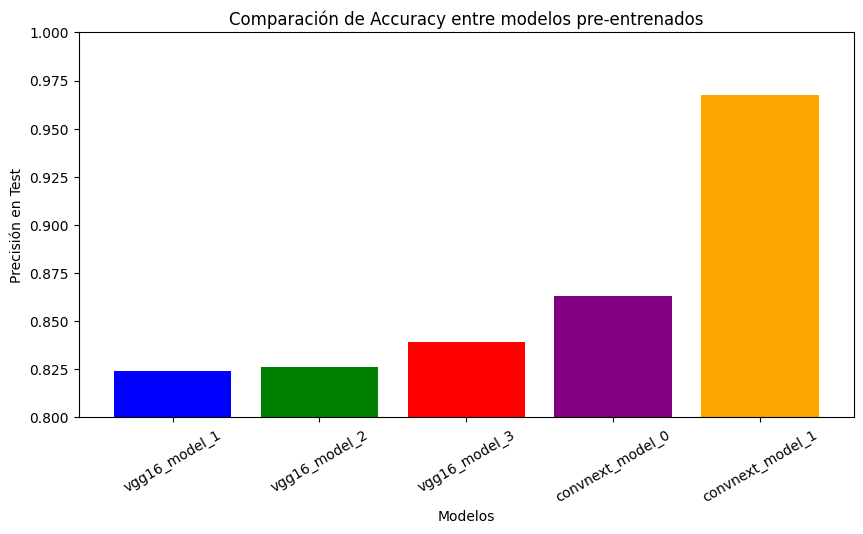

In [37]:
# Visualización (Solo redes pre-entrenadas)
model_names = list(metrics.keys())
accuracy_values = [metrics[m]['test_accuracy'] for m in model_names]

# Crear gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracy_values, color=['blue', 'green', 'red', 'purple', 'orange'])

# Etiquetas y título
plt.xlabel('Modelos')
plt.ylabel('Precisión en Test')
plt.title('Comparación de Accuracy entre modelos pre-entrenados')
plt.xticks(rotation=30)  # Rotar etiquetas para mejor visualización
plt.ylim(0.8, 1.0)  # Ajustar el eje Y para claridad

# Mostrar gráfico
plt.show()